In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install pm4py
!pip install ocpa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26096 sha256=e1e360c9f9cda8d63eff5fa26f4a92a5eff2fd57071a5a2eef32c0d847fd0c18
  Stored in directory: /root/.cache/pip/wheels/fa/80/8c/43488a924a046b733b64de3fac99252674c892a4c3801c0a61
Successfully built intervaltree
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.2/156.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 48.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.7 MB/s eta 0:00:00
  Created wheel for stringdist: filename=StringDist-1.0.9-cp310-cp310-linux_x86_64.whl size=16968 sha256=e1f0bdb32aeae184a91c70544131b941c5cd9adfae675f42d12ec896c5b18add
  Stored in directory: /root/.cache/pip/w

In [ ]:
from datetime import datetime
from pm4py.objects.conversion.log import converter as xes_converter
from pm4py.objects.log.importer.xes import importer as xes_importer


log = xes_importer.apply('/content/drive/MyDrive/ProcessMining/BPI Challenge 2017.xes.gz')


parsing log, completed traces ::   0%|          | 0/31509 [00:00<?, ?it/s]

In [ ]:
import pm4py

In [ ]:
pm4py.convert.convert_to_dataframe(log)

,Action,org:resource,concept:name,EventOrigin,EventID,lifecycle:transition,time:timestamp,case:LoanGoal,case:ApplicationType,case:concept:name,case:RequestedAmount,FirstWithdrawalAmount,NumberOfTerms,Accepted,MonthlyCost,Selected,CreditScore,OfferedAmount,OfferID
0,Created,User_1,A_Create Application,Application,Application_652823628,complete,2016-01-01 09:51:15.304000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,2016-01-01 09:51:15.352000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,2016-01-01 09:51:15.774000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,2016-01-01 09:52:36.392000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,2016-01-01 09:52:36.403000+00:00,Existing loan takeover,New credit,Application_652823628,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202262,Deleted,User_1,W_Call after offers,Workflow,Workitem_1817549786,ate_abort,2017-01-06 06:33:02.212000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202263,Created,User_1,W_Call after offers,Workflow,Workitem_363876066,schedule,2017-01-06 06:33:02.221000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202264,statechange,User_28,A_Cancelled,Application,ApplState_1869071797,complete,2017-01-16 09:51:21.114000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1202265,statechange,User_28,O_Cancelled,Offer,OfferState_420066181,complete,2017-01-16 09:51:21.139000+00:00,Home improvement,New credit,Application_1350494635,20000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Offer_1580299144


In [ ]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)

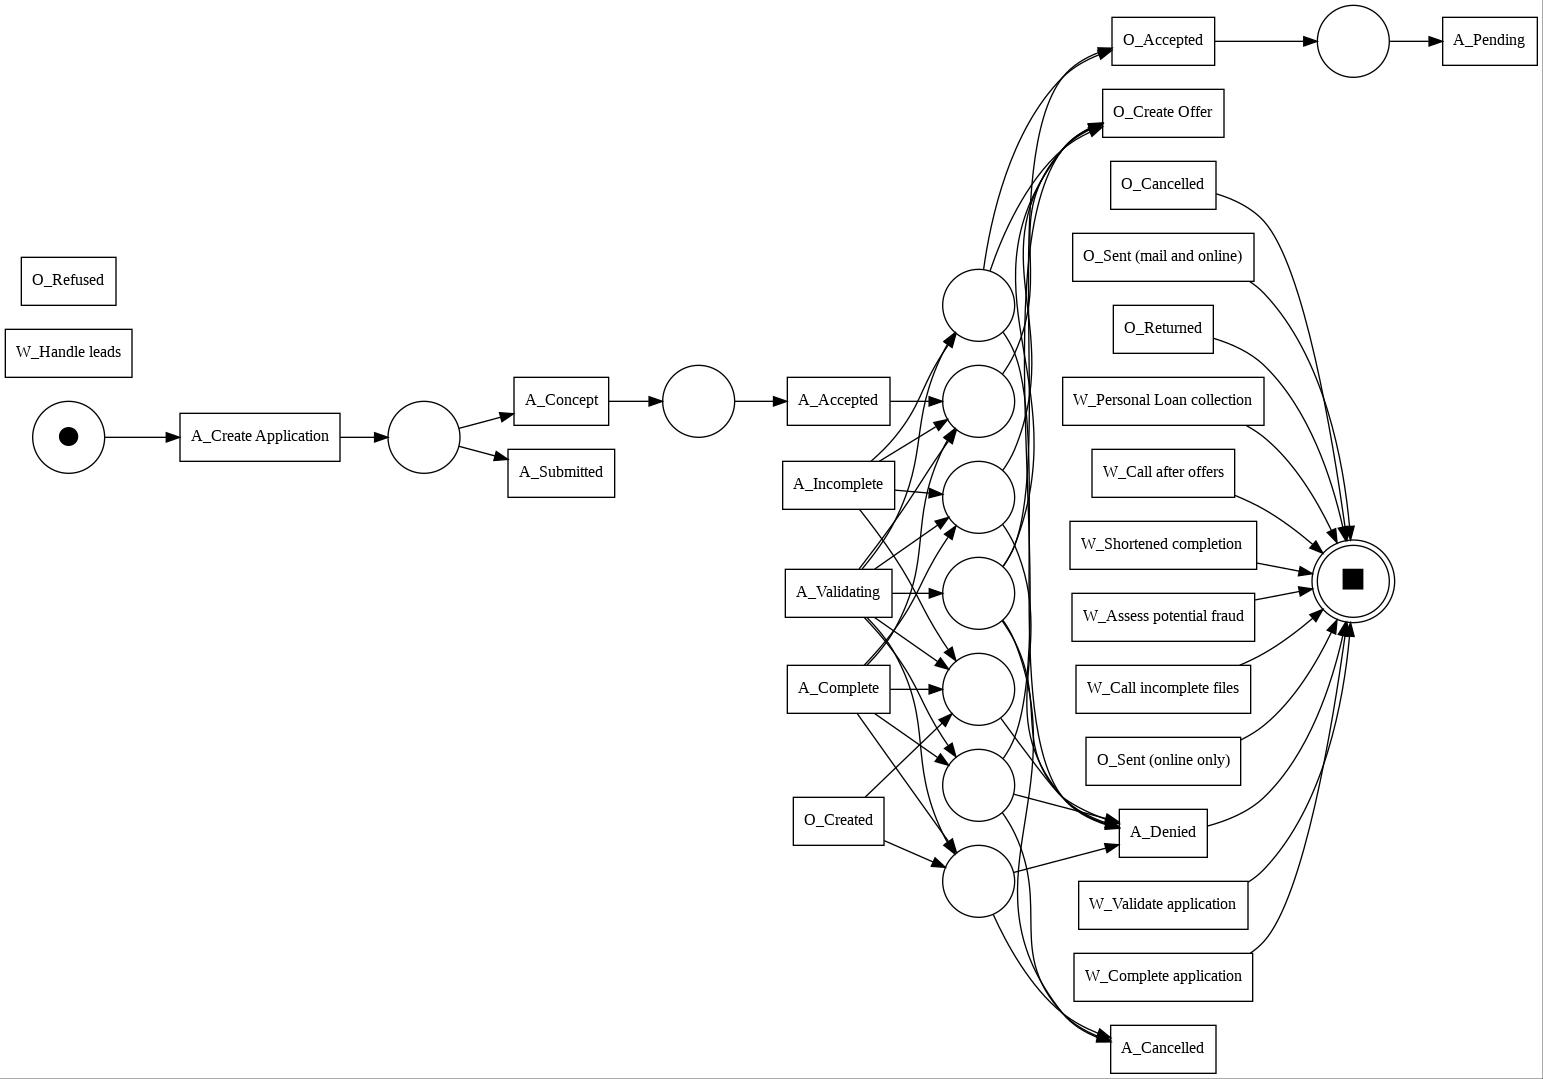

In [ ]:
pm4py.view_petri_net(net, initial_marking, final_marking, format='jpeg')

In [ ]:
from pm4py.objects.ocel.obj import OCEL
from pm4py.objects.ocel.importer.jsonocel import importer as jsonocel_importer
from pm4py.objects.ocel.util import attributes_names

In [ ]:
ocel = pm4py.read_ocel("/content/drive/MyDrive/ProcessMining/BPIC17.jsonocel")
print(ocel)



Object-Centric Event Log (number of events: 1202267, number of objects: 106162, number of activities: 26, number of object types: 4, events-objects relationships: 2404534)
Activities occurrences: {'W_Validate application': 209496, 'W_Call after offers': 191092, 'W_Call incomplete files': 168529, 'W_Complete application': 148900, 'W_Handle leads': 47264, 'O_Create Offer': 42995, 'O_Created': 42995, 'O_Sent (mail and online)': 39707, 'A_Validating': 38816, 'A_Create Application': 31509, 'A_Accepted': 31509, 'A_Concept': 31509, 'A_Complete': 31362, 'O_Returned': 23305, 'A_Incomplete': 23055, 'O_Cancelled': 20898, 'A_Submitted': 20423, 'O_Accepted': 17228, 'A_Pending': 17228, 'A_Cancelled': 10431, 'O_Refused': 4695, 'A_Denied': 3753, 'W_Assess potential fraud': 3282, 'O_Sent (online only)': 2026, 'W_Shortened completion ': 238, 'W_Personal Loan collection': 22}
Object types occurrences (number of objects): {'Offer': 42995, 'Application': 31509, 'Workflow': 31509, 'Case_R': 149}
Please use 

In [ ]:
object_types = pm4py.ocel_get_object_types(ocel)
object_types

['Application', 'Workflow', 'Offer', 'Case_R']

In [ ]:
attribute_names = pm4py.ocel_get_attribute_names(ocel)
attribute_names

['Accepted',
 'Action',
 'ApplicationType',
 'CreditScore',
 'EventID',
 'EventIDraw',
 'EventOrigin',
 'FirstWithdrawalAmount',
 'LoanGoal',
 'MonthlyCost',
 'NumberOfTerms',
 'OfferID',
 'OfferedAmount',
 'RequestedAmount',
 'Selected',
 'case',
 'idx',
 'lifecycle',
 'resource']

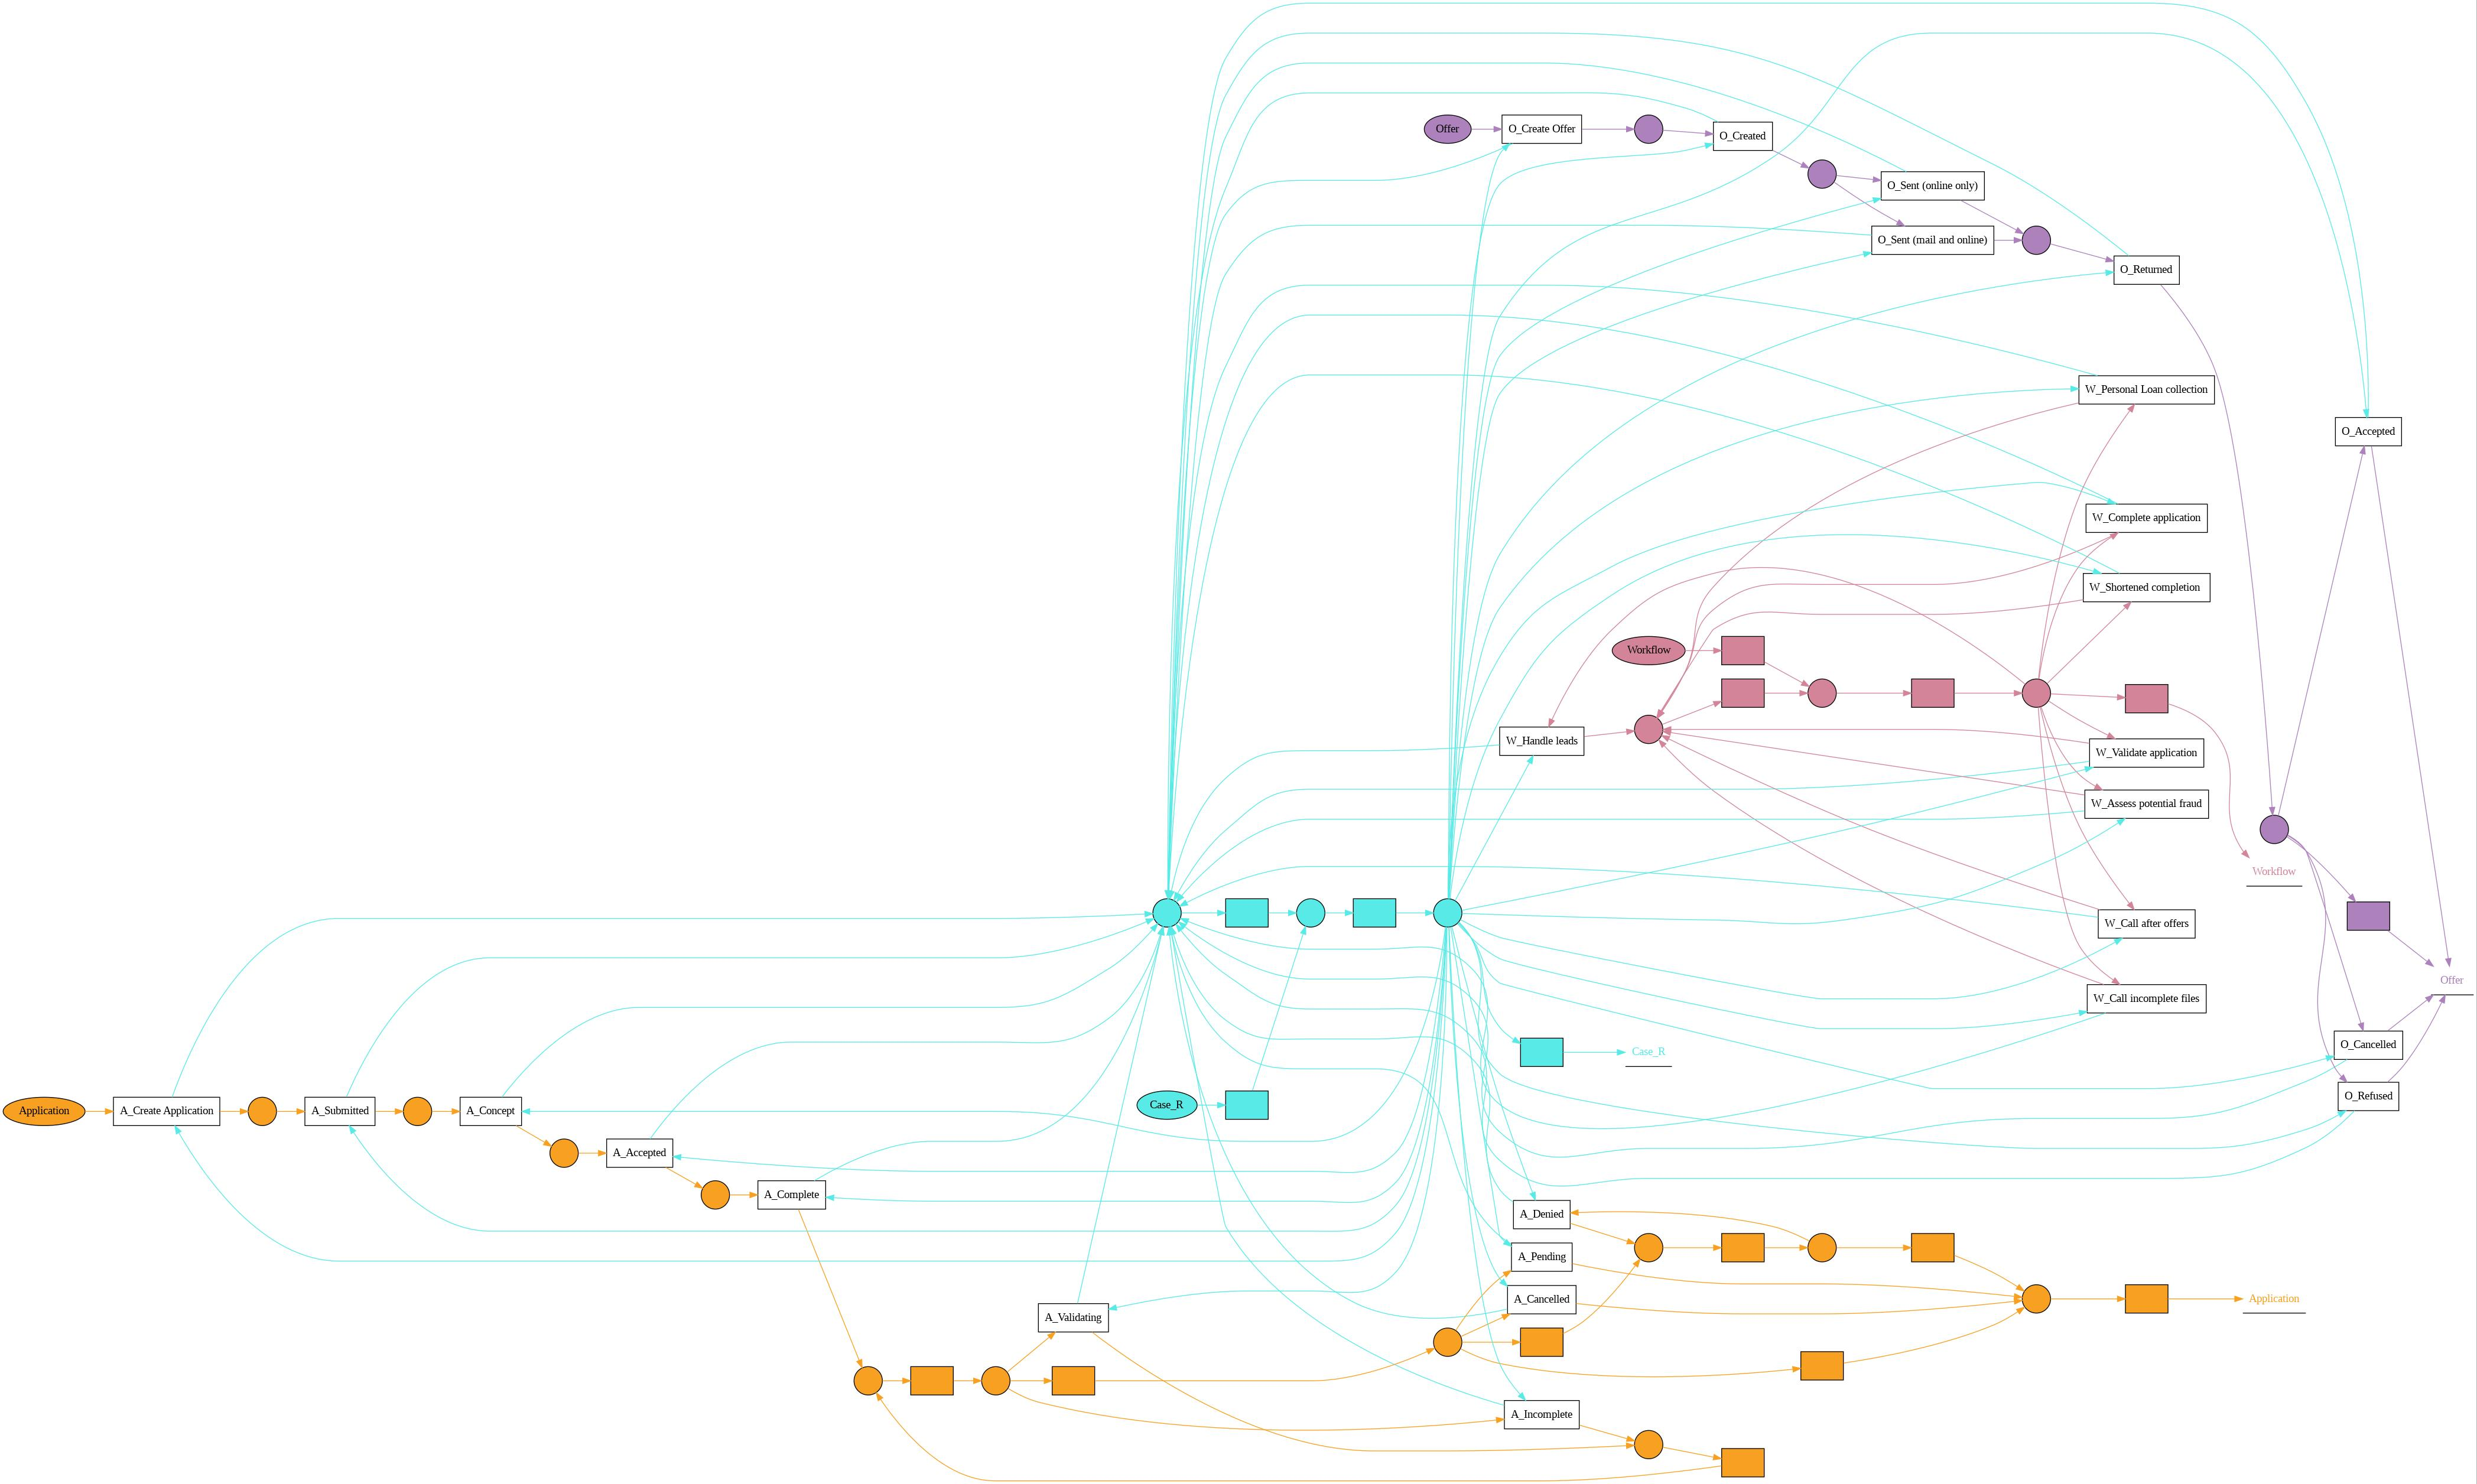

In [ ]:
model = pm4py.discover_oc_petri_net(ocel)
pm4py.view_ocpn(model, format="jpeg")